In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Customer_support_data.csv")
df.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [2]:
df.info()
df.describe(include='all')
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

In [3]:
date_cols = ['order_date_time','Issue_reported at','issue_responded','Survey_response_Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


C:\Users\User\AppData\Local\Temp\ipykernel_19808\3483194350.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_19808\3483194350.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [4]:
df.drop_duplicates(inplace=True)


In [5]:
df['response_time_hours'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 3600


In [6]:
df['survey_delay_days'] = (df['Survey_response_Date'] - df['issue_responded']).dt.days


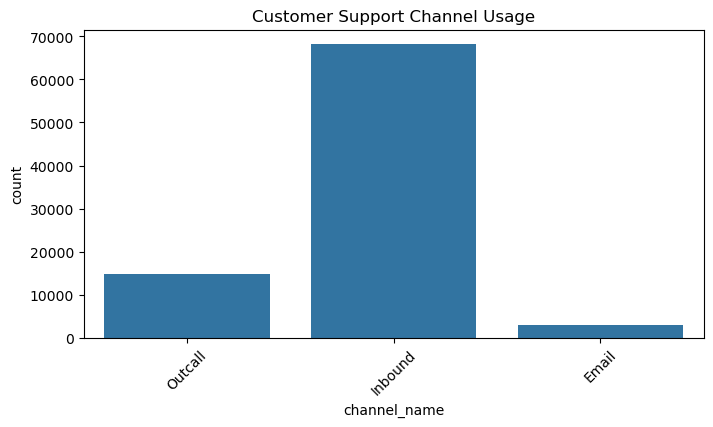

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(x='channel_name', data=df)
plt.title("Customer Support Channel Usage")
plt.xticks(rotation=45)
plt.show()


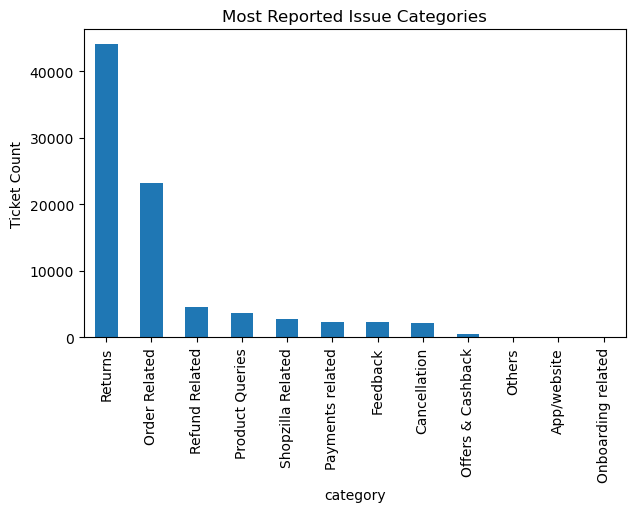

In [8]:
df['category'].value_counts().plot(kind='bar', figsize=(7,4))
plt.title("Most Reported Issue Categories")
plt.ylabel("Ticket Count")
plt.show()


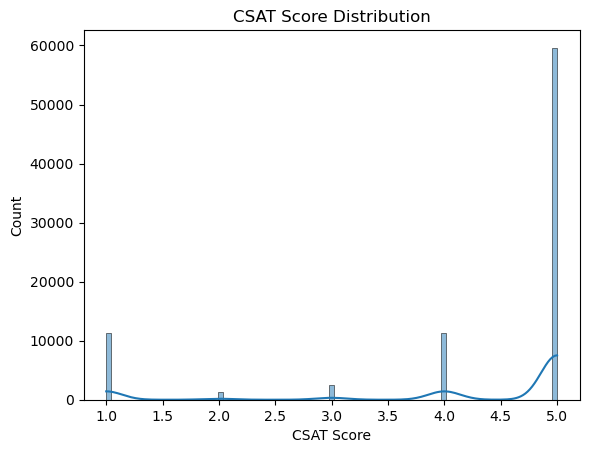

In [9]:
sns.histplot(df['CSAT Score'], kde=True)
plt.title("CSAT Score Distribution")
plt.show()


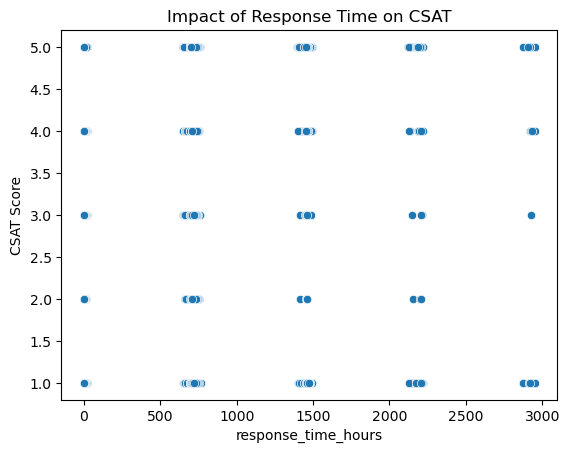

In [10]:
sns.scatterplot(data=df, x='response_time_hours', y='CSAT Score')
plt.title("Impact of Response Time on CSAT")
plt.show()


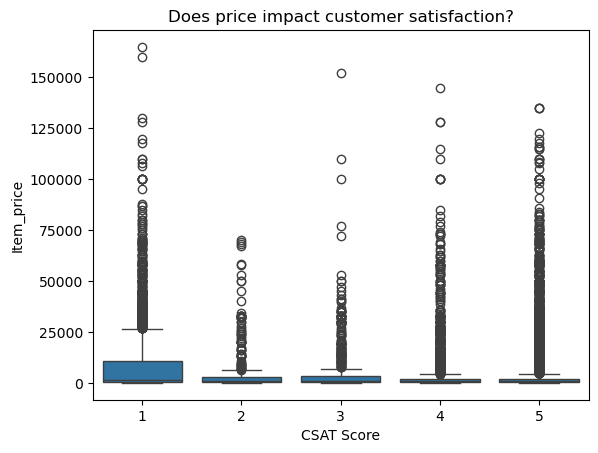

In [11]:
sns.boxplot(x='CSAT Score', y='Item_price', data=df)
plt.title("Does price impact customer satisfaction?")
plt.show()


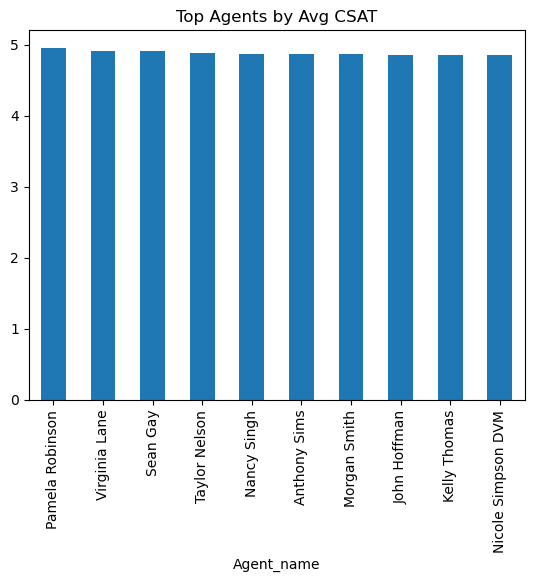

In [12]:
agent_score = df.groupby('Agent_name')['CSAT Score'].mean().sort_values(ascending=False).head(10)
agent_score.plot(kind='bar')
plt.title("Top Agents by Avg CSAT")
plt.show()


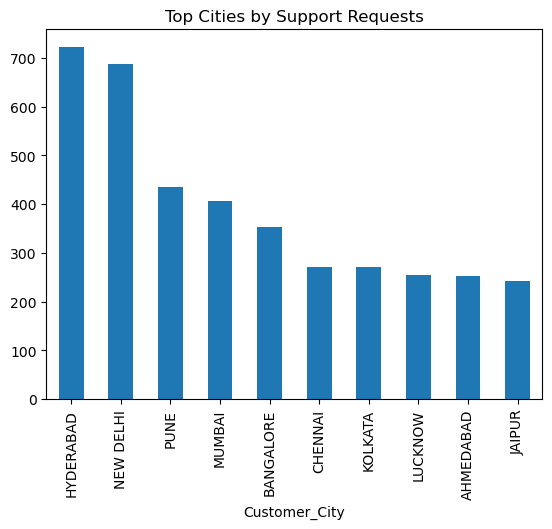

In [13]:
df['Customer_City'].value_counts().head(10).plot(kind="bar")
plt.title("Top Cities by Support Requests")
plt.show()


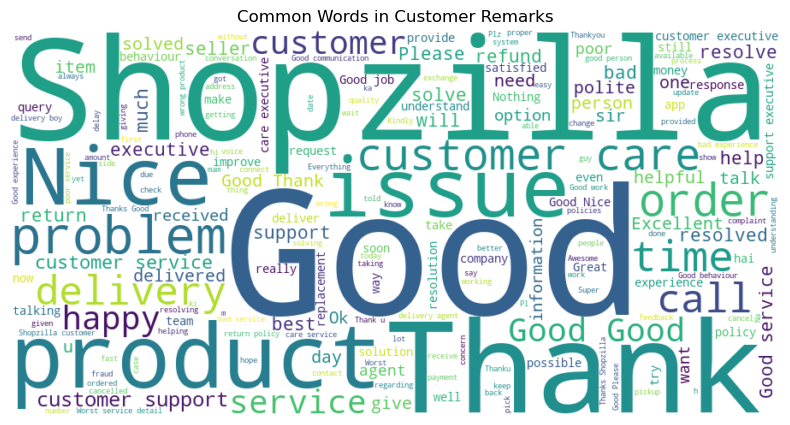

In [14]:
from wordcloud import WordCloud
text = " ".join(df['Customer Remarks'].dropna().astype(str))
wordcloud = WordCloud(width=900, height=450, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Customer Remarks")
plt.show()
